In [1]:
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt            # library for visualization
import random                              # pseudo-random number generator

In [2]:
# downloads sample twitter dataset.
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [3]:
all_positives = twitter_samples.strings('positive_tweets.json')
all_negatives = twitter_samples.strings('negative_tweets.json')

In [5]:
print('Number of positive tweets: ', len(all_positives))
print('Number of negative tweets: ', len(all_negatives))

print('\nThe type of all_positive_tweets is: ', type(all_positives))
print('The type of a tweet entry is: ', type(all_negatives[0]))

Number of positive tweets:  5000
Number of negative tweets:  5000

The type of all_positive_tweets is:  <class 'list'>
The type of a tweet entry is:  <class 'str'>


In [15]:
all_positives[1234]

'@leomanaids_ look here u little shit :-) I fell asleep &amp; then woke up &amp; thought u were asleep :-) PLUS this was earlier :-) so fuk u dude'

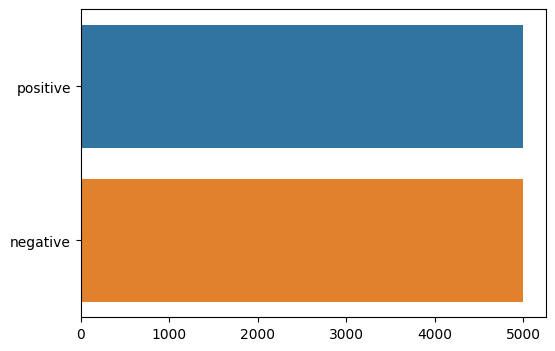

In [20]:
# Plot the number of positive and negative tweets
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (6,4))
sns.barplot(y=['positive','negative'],x=[len(all_positives), len(all_negatives)])
plt.show()

In [12]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [55]:
import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

In [39]:
# Remove the old RT style retweets
tweet = all_positives[1234]
print(tweet)

tweet2 = re.sub(r'^RT[\s]+', '', tweet)
print(f"After removing RT {tweet2}")

@leomanaids_ look here u little shit :-) I fell asleep &amp; then woke up &amp; thought u were asleep :-) PLUS this was earlier :-) so fuk u dude
After removing RT @leomanaids_ look here u little shit :-) I fell asleep &amp; then woke up &amp; thought u were asleep :-) PLUS this was earlier :-) so fuk u dude


In [40]:
# Remove Hyperlinks
tweet2 = re.sub(r'https?://[^\s\n\r]+', '', tweet2)
print(f"After removing hyperlinks {tweet2}")

After removing hyperlinks @leomanaids_ look here u little shit :-) I fell asleep &amp; then woke up &amp; thought u were asleep :-) PLUS this was earlier :-) so fuk u dude


In [41]:
# remove hashtags
# only removing the hash # sign from the word
tweet2 = re.sub(r'#', '', tweet2)
print(f"After removing hash {tweet2}")

After removing hash @leomanaids_ look here u little shit :-) I fell asleep &amp; then woke up &amp; thought u were asleep :-) PLUS this was earlier :-) so fuk u dude


In [42]:
print()
print('\033[92m' + tweet2)
print('\033[94m')

# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

# tokenize tweets
tweet_tokens = tokenizer.tokenize(tweet2)

print()
print('Tokenized string:')
print(tweet_tokens)


@leomanaids_ look here u little shit :-) I fell asleep &amp; then woke up &amp; thought u were asleep :-) PLUS this was earlier :-) so fuk u dude


Tokenized string:
['look', 'here', 'u', 'little', 'shit', ':-)', 'i', 'fell', 'asleep', '&', 'then', 'woke', 'up', '&', 'thought', 'u', 'were', 'asleep', ':-)', 'plus', 'this', 'was', 'earlier', ':-)', 'so', 'fuk', 'u', 'dude']


In [44]:
stopwords = stopwords.words('english')

In [45]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [46]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [48]:
print(tweet_tokens)

tweets_f = []

for word in tweet_tokens:
  if word not in stopwords and word not in string.punctuation:
    tweets_f.append(word)

['look', 'here', 'u', 'little', 'shit', ':-)', 'i', 'fell', 'asleep', '&', 'then', 'woke', 'up', '&', 'thought', 'u', 'were', 'asleep', ':-)', 'plus', 'this', 'was', 'earlier', ':-)', 'so', 'fuk', 'u', 'dude']


In [49]:
tweets_f

['look',
 'u',
 'little',
 'shit',
 ':-)',
 'fell',
 'asleep',
 'woke',
 'thought',
 'u',
 'asleep',
 ':-)',
 'plus',
 'earlier',
 ':-)',
 'fuk',
 'u',
 'dude']

In [50]:
stemmer = PorterStemmer()

tweets_stem = []

for word in tweets_f:
  stem_w = stemmer.stem(word)
  tweets_stem.append(stem_w)

print(tweets_stem)

['look', 'u', 'littl', 'shit', ':-)', 'fell', 'asleep', 'woke', 'thought', 'u', 'asleep', ':-)', 'plu', 'earlier', ':-)', 'fuk', 'u', 'dude']


In [56]:
def process_tweet(tweet):
    """Process tweet function.
    Input:
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet

    """
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?://[^\s\n\r]+', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean

In [57]:
tweet = all_positives[1234]
process_tweet(tweet)

['look',
 'u',
 'littl',
 'shit',
 ':-)',
 'fell',
 'asleep',
 'woke',
 'thought',
 'u',
 'asleep',
 ':-)',
 'plu',
 'earlier',
 ':-)',
 'fuk',
 'u',
 'dude']